# Symmetry test in python
In this example, we use [`rpy_symmetry`](https://pypi.org/project/rpy-symmetry/) to calculate the "symmetry" of the distribution using:
 - Mira A (1999) Distribution-free test for symmetry based on Bonferroni's measure. J Appl Stat 26(8):959–972. [doi](https://doi.org/10.1080/02664769921963)
     - The abstract states:
       "We propose a test based on Bonferroni's measure of skewness. The test detects the asymmetry of a distribution function about an unknown median. We study the asymptotic distribution of the given test statistic and provide a consistent estimate of its variance. The asymptotic relative efficiency of the proposed test is computed along with Monte Carlo estimates of its power. This allows us to perform a comparison of the test based on Bonferroni's measure with other tests for symmetry. " 
 - We use the implementation of [this `symmetry` module](https://cran.r-project.org/web/packages/symmetry/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rpy_symmetry as rsym
from tqdm import tqdm

In [2]:
np.random.seed(0)

In [3]:
symmetry = rsym.get_module()

## Example: bi-modal gausian distributions

As one example, we create a bi-modal distribution. This consists of two guassian populations which are seperated by some distance `separation`. 

We initialize both gausian distrubutuions using the `rmixnorm` method from the above cited `symmerty` module.

In [4]:
# Contstants for two distributions
n=1e4
mu0=0
s0=1
dist=7
s1=2
frac0=0.9
bi_modal=symmetry.rmixnorm(n, mean1=mu0, sd1=s0, mean2=mu0+dist, p=frac0)

Text(7, 1000.0, 'separation')

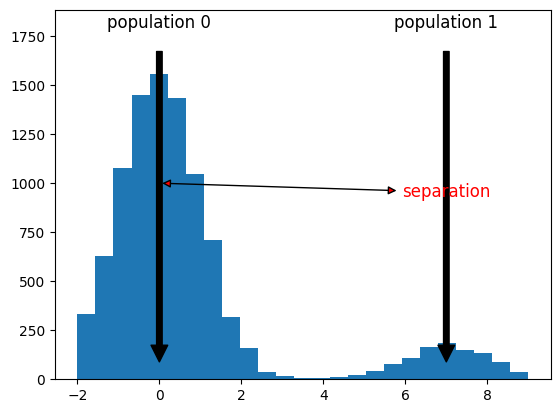

In [5]:
c, _, _ = plt.hist(bi_modal, range=[mu0-s0*2, mu0+s0*2+dist], bins=25)
text_kw = dict(textcoords='data', 
               fontsize=12, 
               arrowprops=dict(facecolor='black', shrink=0.05),
               horizontalalignment='center', 
               verticalalignment='top',
              )
_offset_y=1.2
plt.ylim(0, max(c)*_offset_y*1.01)
plt.annotate('population 0', (mu0,0), (mu0, max(c)*_offset_y),**text_kw)
plt.annotate('population 1', (mu0+dist,0), (mu0+dist, max(c)*_offset_y),**text_kw)
plt.annotate('separation', (mu0,n/10), (mu0+dist, n/10) , **{**text_kw, **{'arrowprops': dict(facecolor='red', arrowstyle='<|-|>')}}, 
             c='red')

## Calculate the test p-values on ensambles

Now let's see how the p-values change as a function of the seperation of the two distributions. 

In [6]:
seperations=np.linspace(0, 7.5, 6)
reps = 100
n=85
results = []
for s in seperations:
    buff = [rsym.p_symmetry(
        symmetry.rmixnorm(n, mean1=mu0, sd1=s0, mean2=mu0+float(s), p=frac0))
        for _ in tqdm(range(reps))
        ]
    results.append(buff)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [18:14<00:00,  4.57it/s]


In [7]:
def hist(d, **kw):
    c, be = np.histogram(d, **kw)
    return (be[1:]+be[:-1]) / 2, c, be[1] - be[0]

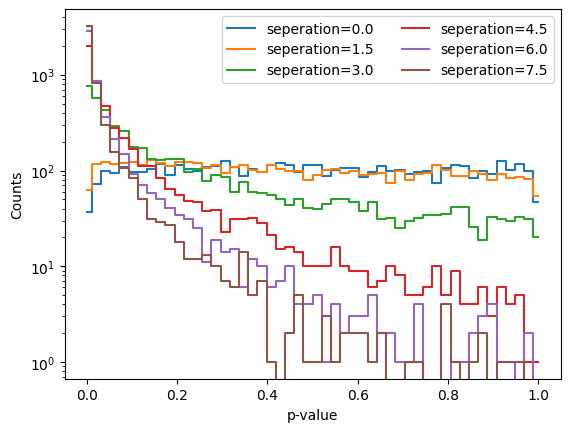

In [12]:
kw = dict(bins=25, range=[-0.01,1.01])
for i, s in enumerate(seperations):
    hx, hy, _= hist(results[i], **kw)
    plt.plot(hx,hy,drawstyle='steps-mid', label=f'seperation={s:0.1f}')
plt.legend(ncol=2)
plt.ylabel('Counts')
plt.xlabel('p-value')
plt.yscale('log')

(0.0, 1.0)

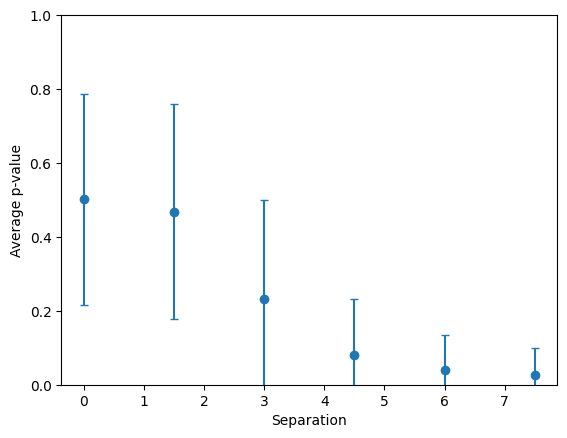

In [9]:
plt.errorbar(seperations, 
             np.mean(np.array(results), axis=1),
             np.std(np.array(results), axis=1),
             capsize=3, 
             ls='',
             marker='o')
plt.xlabel('Separation')
plt.ylabel('Average p-value')
plt.ylim(0,1)